# <span style="color:orange">Clustering sur les données du Baromètre lorrain de la Science Ouverte</span>

Le clustering, ou partitionnement des données, est une méthode d'analyse permettant de rassembler des données dans des "paquets", afin d'identifier des relations, des tendances. Ici, l'objectif est de voir s'il existe une corrélation entre le nombre de publications et leur taux d'accès ouvert, ou encore une corrélation entre accès ouvert et discipline.

**Il faut remplacer "toulon" par le nom de l'établissement directement dans le code ci-dessous. Vous pouvez faire ctrl+f pour modifier toutes les occurrences d'un coup.**

En cas d'erreur "module seaborn inexistant", saisir la commande suivante : %pip install seaborn

In [1]:
%pip install seaborn 

Note: you may need to restart the kernel to use updated packages.


In [1]:
# Importer les librairies nécessaires
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import seaborn  as sns

Importer le jeu de données avec lequel on souhaite travailler (changer la partie "toulon" en fonction de l'établissement) :

In [3]:
publis_toulon_df = pd.read_csv("Data/outputs/publis_toulon_completes.csv")

Restreindre à l'année souhaitée (modifier l'année pour les mises à jour) :

In [4]:
publications_2019 = publis_toulon_df.loc[publis_toulon_df['published_year'] == 2019.0,:]

Créer une DataFrame avec deux informations : le nombre de publications dans l'année en fonction de la discipline, et le nombre de publications en accès ouvert dans ces mêmes disciplines.

In [5]:
publications_par_domaine = publications_2019['scientific_field'].value_counts().sort_index()
publications_par_domaine = publications_par_domaine.to_frame()

In [6]:
publications_en_oa = publications_2019.loc[publications_2019['is_oa']==True,:]
publications_en_oa = publications_en_oa['scientific_field'].value_counts().sort_index()
publications_en_oa = publications_en_oa.to_frame()
publications_en_oa

,scientific_field
Biology (fond.),131
Chemistry,28
Computer and \n information sciences,51
"Earth, Ecology, \nEnergy and applied biology",88
Engineering,23
Humanities,18
Mathematics,29
Medical research,36
"Physical sciences, Astronomy",134
Social sciences,20


In [7]:
publis_triees = pd.merge(publications_par_domaine, publications_en_oa, left_index = True, right_index = True)
publis_triees = publis_triees.rename(columns = {'scientific_field_x': 'Nombre total de publications', 'scientific_field_y': 'Nb de publications en accès ouvert'})
publis_triees = publis_triees.rename_axis('Disciplines')
# Ajout d'une colonne pour l'affichage des disciplines dans le graphique
publis_triees["Disciplines"] = publications_en_oa.index
# Ajout d'une colonne avec le calcul des pourcentages d'accès ouvert
publis_triees["Pourcentage d'accès ouvert"] = ((publis_triees["Nb de publications en accès ouvert"] * 100) / publis_triees["Nombre total de publications"])
# N'afficher que la première décimale pour la colonne des pourcentages
pd.set_option('precision', 1)
# Supprimer les lignes où la discipline est inconnue
indexNames = publis_triees[publis_triees['Disciplines'] == 'unknown' ].index
publis_triees.drop(indexNames , inplace=True)
publis_triees

,Nombre total de publications,Nb de publications en accès ouvert,Disciplines,Pourcentage d'accès ouvert
Disciplines,,,,
Biology (fond.),158,131,Biology (fond.),82.9
Chemistry,41,28,Chemistry,68.3
Computer and \n information sciences,73,51,Computer and \n information sciences,69.9
"Earth, Ecology, \nEnergy and applied biology",100,88,"Earth, Ecology, \nEnergy and applied biology",88.0
Engineering,29,23,Engineering,79.3
Humanities,24,18,Humanities,75.0
Mathematics,33,29,Mathematics,87.9
Medical research,57,36,Medical research,63.2
"Physical sciences, Astronomy",154,134,"Physical sciences, Astronomy",87.0


IndexError: invalid index to scalar variable.

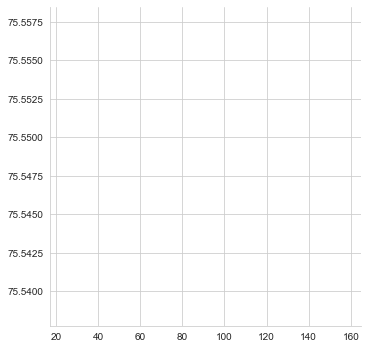

In [8]:
sns.set_style("whitegrid")

facet = sns.lmplot(data=publis_triees, x='Nombre total de publications', y="Pourcentage d'accès ouvert", hue='Disciplines',
                   fit_reg=False, legend=False, legend_out=False, palette=['red','aqua', 'blue', 'gold', 'green',
                                                                        'darkgray', 'darkviolet', 'teal', 'deeppink', 'black', 'white'],
                  scatter_kws={"s": 80})

plt.title("Taux d'accès ouvert 2019 par rapport au nombre de publications, par discipline", fontsize = 15, x = 1, y = 2,
          fontweight = 'bold', alpha = 0.8)

plt.legend(title='Disciplines', loc='best', labels=['Biologie (fond.)', 'Chimie', 
                                         'Informatique',
                                       'Sciences de la Terre, Ecologie, \nEnergie et biologie appliquée',
                                        "Sciences de l'Ingénieur",
                                        'Humanités',
                                        'Mathématiques',
                                        'Sciences médicales',
                                        'Sciences physiques, astronomie',
                                       'Sciences sociales'], bbox_to_anchor=(1.1, 0.7))

plt.savefig('Data/outputs/2019_rapport_oa_nb_publications.png', dpi=100, bbox_inches='tight', pad_inches=0.9)

Répéter l'opération pour le graphique par éditeurs. Modifier l'année pour les mises à jour.

In [9]:
publications_par_editeur = publications_2019['publisher'].value_counts().sort_index()
publications_par_editeur = publications_par_editeur.to_frame()

In [10]:
publications_en_oa_ed = publications_2019.loc[publications_2019['is_oa']==True,:]
publications_en_oa_ed = publications_en_oa_ed['publisher'].value_counts().sort_index()
publications_en_oa_ed = publications_en_oa_ed.to_frame()

In [11]:
publis_triees_ed = pd.merge(publications_par_editeur, publications_en_oa_ed, left_index = True, right_index = True)
publis_triees_ed = publis_triees_ed.rename(columns = {'publisher_x': 'Nombre total de publications', 'publisher_y': 'Nb de publications en accès ouvert'})
publis_triees_ed = publis_triees_ed.rename_axis('Editeurs')
publis_triees_ed["Editeurs"] = publications_en_oa_ed.index
publis_triees_ed = publis_triees_ed.sort_values(by=['Nombre total de publications'], ascending=False)
# Limiter le nombre d'éditeurs affichés aux 3 premiers. Ce chiffre peut être modulé comme on le souhaite mais attention, le graphique doit rester lisible
publis_triees_ed = publis_triees_ed[0:7]
publis_triees_ed["Pourcentage d'accès ouvert"] = ((publis_triees_ed["Nb de publications en accès ouvert"] * 100) / publis_triees_ed["Nombre total de publications"])
# N'afficher que la première décimale pour la colonne des pourcentages
pd.set_option('precision', 1)
publis_triees_ed

,Nombre total de publications,Nb de publications en accès ouvert,Editeurs,Pourcentage d'accès ouvert
Editeurs,,,,
Elsevier BV,164,131,Elsevier BV,79.9
Springer Science and Business Media LLC,102,88,Springer Science and Business Media LLC,86.3
Wiley,37,20,Wiley,54.1
American Physical Society (APS),30,28,American Physical Society (APS),93.3
MDPI AG,28,28,MDPI AG,100.0
Informa UK Limited,25,12,Informa UK Limited,48.0
Frontiers Media SA,20,20,Frontiers Media SA,100.0
American Chemical Society (ACS),19,14,American Chemical Society (ACS),73.7
IOP Publishing,19,16,IOP Publishing,84.2


IndexError: invalid index to scalar variable.

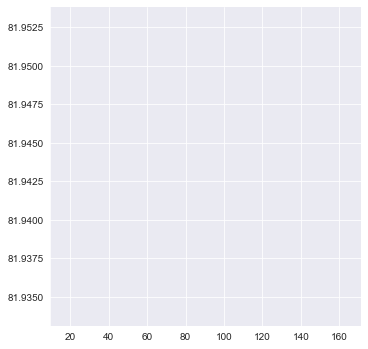

In [12]:
sns.set_style("darkgrid")

facet = sns.lmplot(data=publis_triees_ed, x='Nombre total de publications', y="Pourcentage d'accès ouvert", hue='Editeurs',
                   fit_reg=False, legend=False, scatter_kws={"s": 50}, palette= 'Paired')

plt.title("Taux d'accès ouvert 2019 par rapport au nombre de publications, par éditeur/plateforme", fontsize = 15, x = 0.5, y = 1,
          fontweight = 'bold', alpha = 0.8)

for ax in facet.axes.ravel():
    for t, x, y in publis_triees_ed[["Editeurs","Nombre total de publications","Pourcentage d'accès ouvert"]].values.tolist():
        ax.annotate(t, (x, y))

plt.savefig('Data/outputs/2019_rapport_oa_nb_publications_editeurs.png', dpi=100, bbox_inches='tight', pad_inches=0.9)